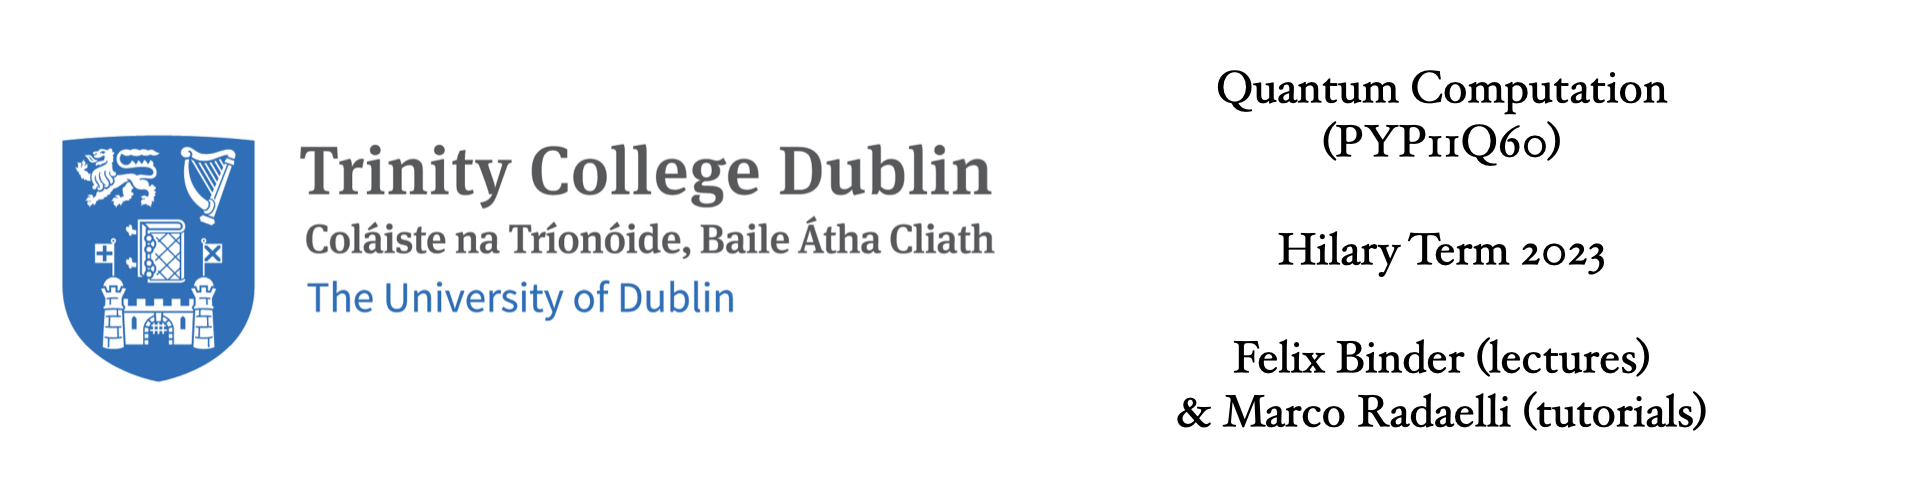

# Problem set 4

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import circuit_drawer, plot_histogram
from tabulate import tabulate


In [2]:
qasm = BasicAer.get_backend('qasm_simulator')

<a id="reflection"></a>
# 4.1 - Inside the reflection operator (4 pts.)
In the lecture, we defined the reflection operator ${R}$ as
$$ {R} = 2\ket{\psi}\bra{\psi} - \mathbb{I},$$
where $\ket{\psi}$ is the equal superposition of all states, given by
$$ \ket{\psi} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \ket{x}.$$
<ol>
    <li> Create a Python function <code>generate_reflection(number_qubits)</code> which outputs a Qiskit quantum gate that performs the reflection operator on <code>number_qubits</code> qubits. Draw the quantum circuit yielding the gate for <code>number_qubits</code>=1, 2, 5.</li>
    <li> Prove that the operator ${R}$, applied to a generic state
    $$ \ket{\phi} = \sum_k \alpha_k \ket{k},$$
    produces the output state 
    $$\sum_k \left[-\alpha_k + 2 \overline\alpha \right]\ket{k},$$
    where 
    $$\overline\alpha := \sum_k \frac{\alpha_k}{N}.$$
         </li>
</ol>

In [3]:
#4.1.1 Solution
def generate_reflection(n):
    qc = QuantumCircuit(n)

    for qubit in range(n):
        qc.h(qubit)
    for qubit in range(n):
        qc.x(qubit)
    if n > 1 : 
        qc.h(n-1)
        qc.mct(list(range(n-1)), n-1)  # multi-controlled-toffoli
        qc.h(n-1)
    for qubit in range(n):
        qc.x(qubit)
    for qubit in range(n):
        qc.h(qubit)
    print(qc)
    # We will return the diffuser as a gate
    gate = qc.to_gate(label='Diffuser')
    return gate

num_qubits = [1,2,5]
for i in num_qubits : 
    print("Num qubits = ", i)
    generate_reflection(i)



        

Num qubits =  1
   ┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ X ├┤ X ├┤ H ├
   └───┘└───┘└───┘└───┘
Num qubits =  2
     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_1: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘
Num qubits =  5
     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_3: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_4: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘


### 4.1.2 Solution  
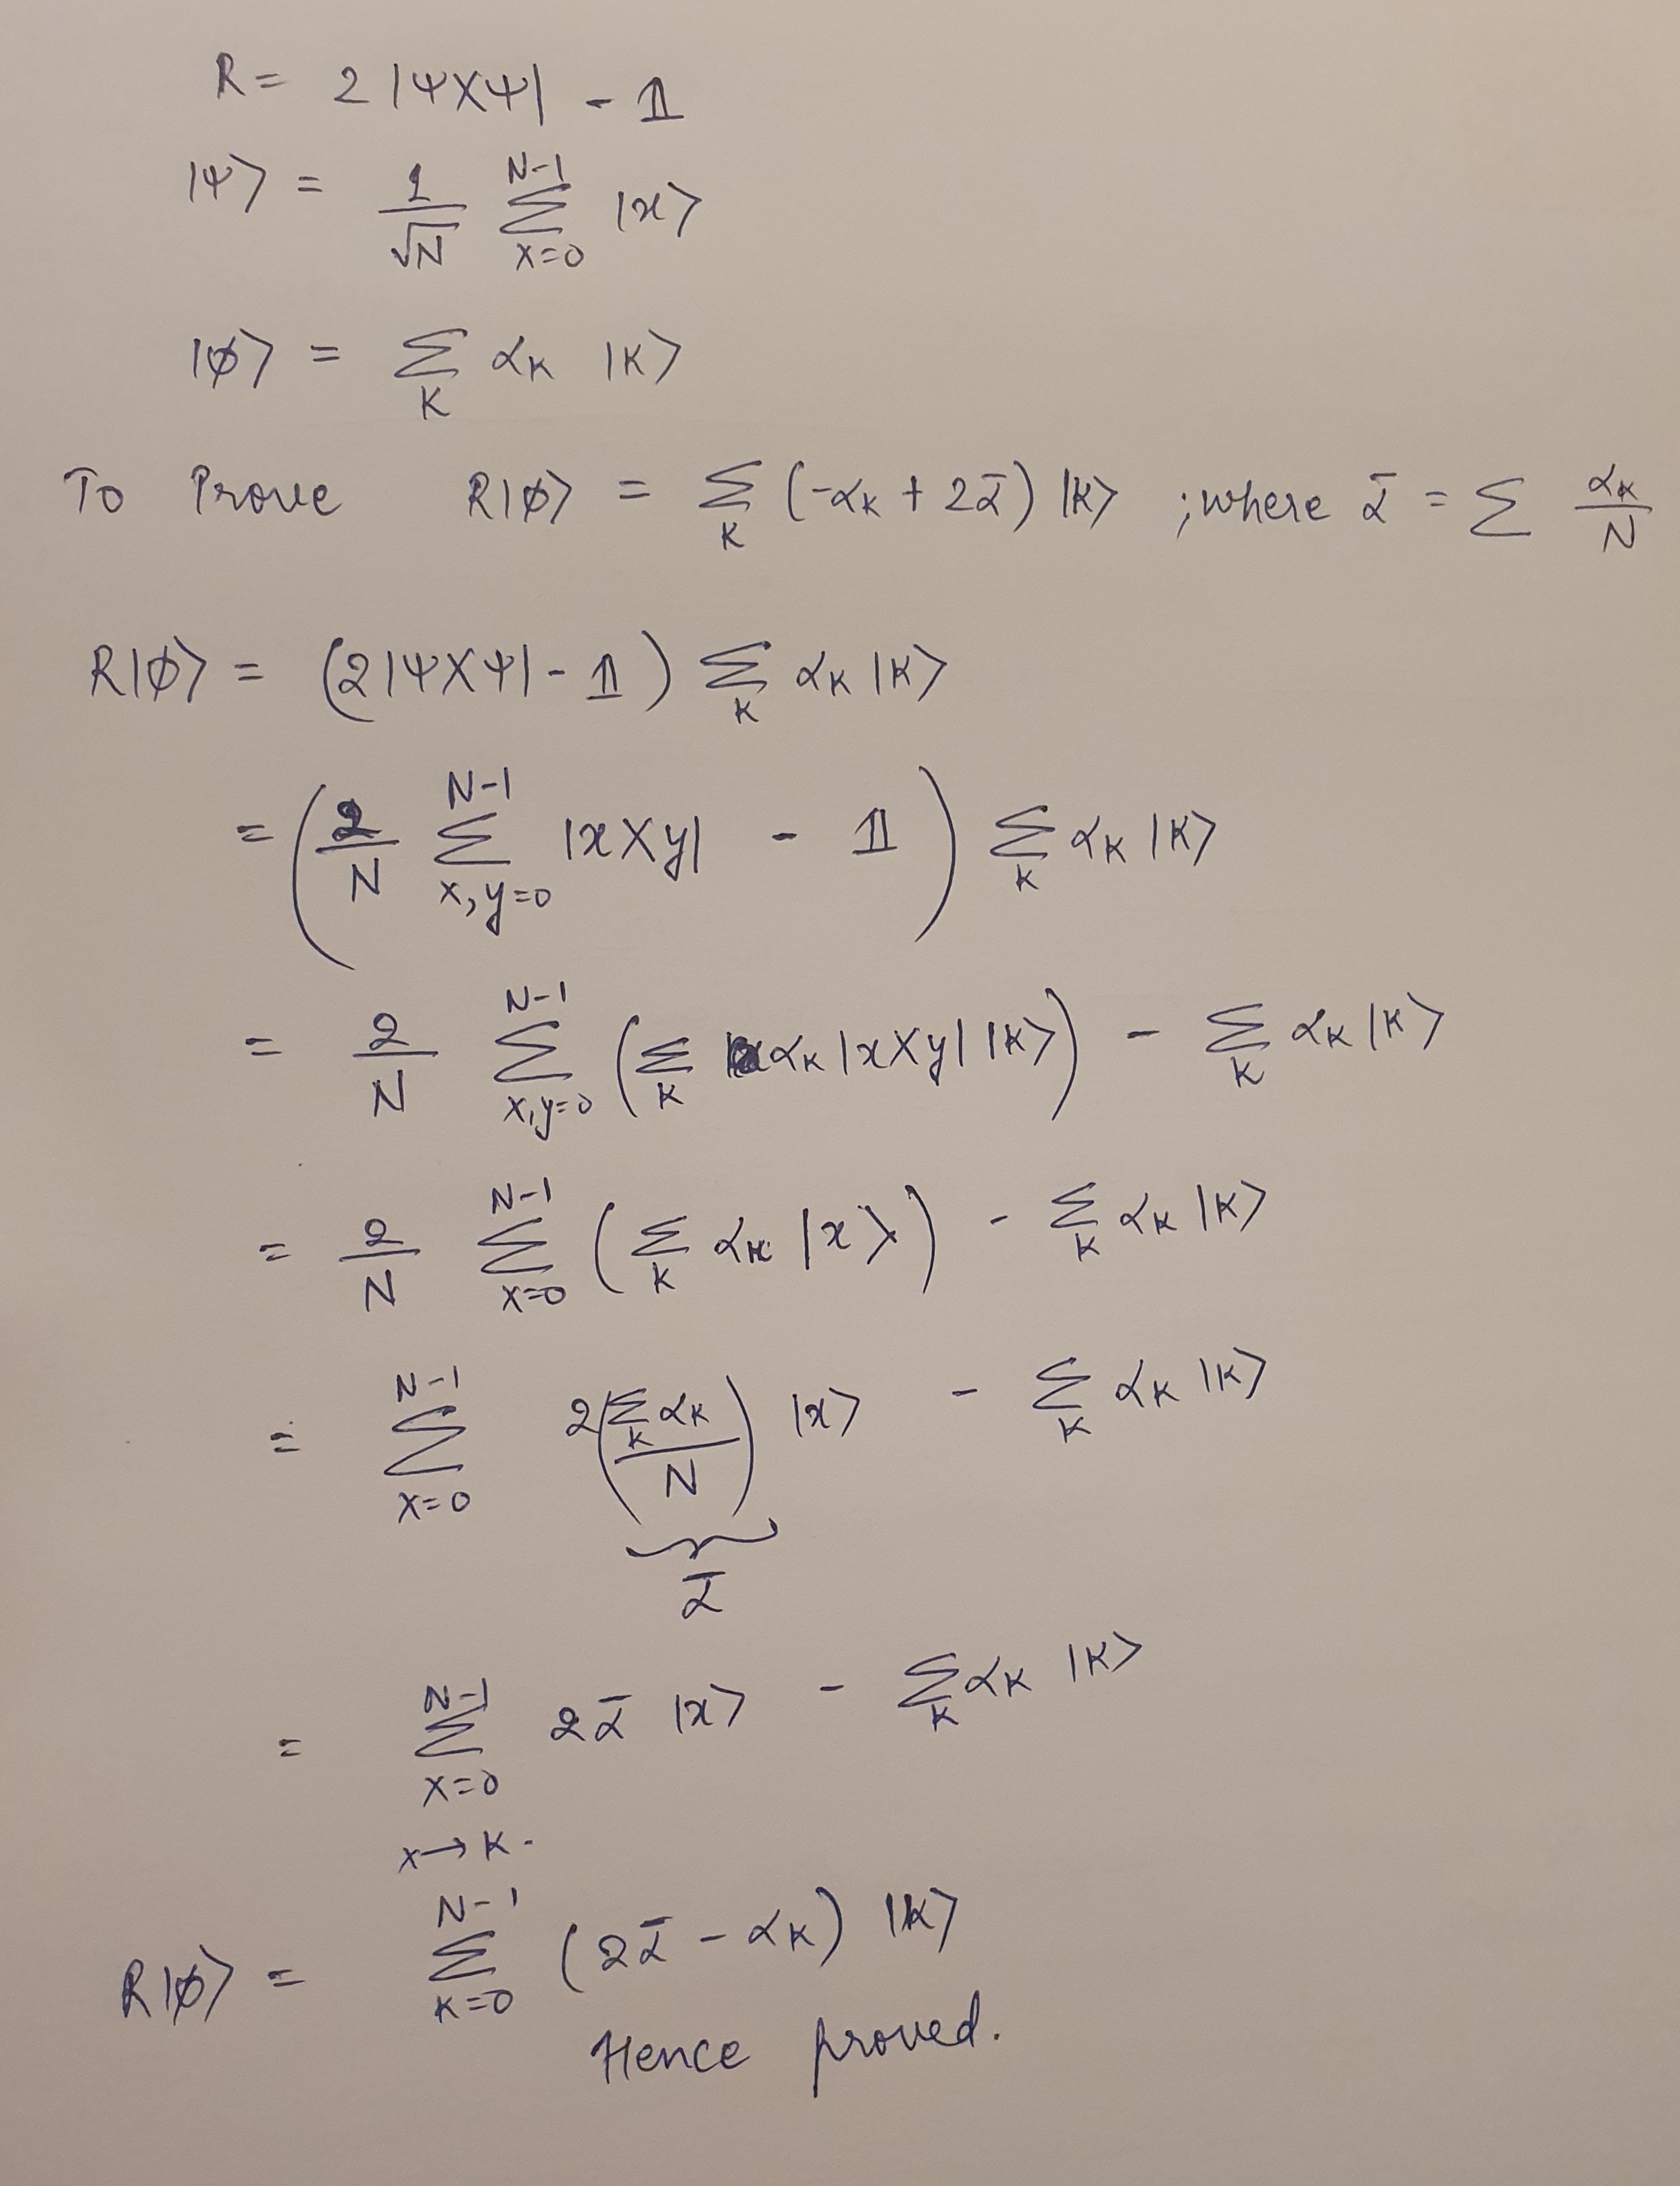

# 4.2 - A Quantum Sudoku (5 pts. total)
In this exercise, we will use the Quantum Search protocol to solve a simplified version of the popular puzzle game <it>Sudoku</it>. In particular, we will consider a $2\times 2$ Sudoku, which is a table like this:

|   |   |
|---|---|
|$v_0$| $v_1$ |
| $v_2$ | $v_3$ |

where $v_j \in \{0,1\}$ for all $j$.

A sudoku is <b>valid</b> if and only if no symbol appears more than once in each row and in each column. In other words, we require that $v_0 \neq v_1$, $v_1 \neq v_3$, $v_2 \neq v_3$ and $v_0 \neq v_2$.

## 4.2.a Classical version (0.5 pt.)
<ol>
    <li>Prove that, once one of $v_0$, $v_1$, $v_2$ and $v_3$ is specified, the scheme is fully determined.</li>
    <li>Are all the inequality conditions above independent? Is it possible to use a smaller number of conditions? Comment on this.</li>
    <li>Write a Python function <code>sudoku_solver</code> that takes binary inputs <code>value</code> and <code>cell_index</code> and outputs solution of the game.</li></ol>

### 4.2.a.1 Solution
If any one of $\nu_0, \nu_1, \nu_2, \nu_3$ is known then we can find the others with certainity using the given conditions. For example, if $\nu_0$ is 0, then,  
$\implies$ $\nu_1 = 1$ and $\nu_2 =1$ as $\nu_0 \neq \nu_1$ and $\nu_0 \neq \nu_2$ and the only other possible value is 1  
$\implies$ $\nu_3 = 0$ as it is not equal to $\nu_2$ and $\nu_1$ and the only other possible value is zero.  
In the same way, we can find the other values $\nu$ if any one of them is given.  


### 4.2.a.2 Solution  
No, the inequality conditions given above are not independent. They are interrelated. We can reduce it to three equations.  
$\nu_0 = \nu_3$  
$\nu_1 = \nu_2$  
$\nu_0 \neq \nu_1$  
This can further be simplified by saying that in the sudoku matrix the sum of every row and every column is 1. That is,   
$\sum_{i} \nu_i = 1$ , where $\nu_i$ are the elements of any row and column

In [4]:
#4.2.a.3 Solution
def sudoku_solver(value, cell_index) : 

    flag = 0 
    #if we break down the sudoku into a list then only possible outputs are : [0,1,1,0] (flag=1) and [1,0,0,1] (flag=2)
    #Below, we check the value and cell_index and flag it accordingly
    if value == 0 : 
        if cell_index == 0 or cell_index == 3 : 
            flag = 1 
        else : 
            flag = 2 
    elif value == 1 : 
        if cell_index == 1 or cell_index == 2 : 
            flag = 1 
        else : 
            flag = 2 
    if flag == 1 : 
        sudoku = [[0,1],
                [1,0]]
    elif flag == 2 : 
        sudoku = [[1,0],
                [0,1]]
    #print(flag)
    print(tabulate(sudoku, tablefmt="fancy_grid"))         #Tabulating sudoku
    return np.array(sudoku)
solution = sudoku_solver(0,0)       #change the value and cell_index to find different solutions
        

╒═══╤═══╕
│ 0 │ 1 │
├───┼───┤
│ 1 │ 0 │
╘═══╧═══╛


## 4.2.b A reversible solution checker (1 pts.)
The first step towards our quantum sudoku solver is to create a reversible logic to check whether a proposed solution is valid or not. In particular, we need to be able to test whether two given items are different, and this can be checked using a <code>XOR</code> gate.

Create a quantum circuit $\mathcal{X}$ performing a <code>XOR</code> gate on three qubits in this way:
$$\mathcal{X} \ket{a}\ket{b}\ket{c} = \ket{a}\ket{b}\ket{c \oplus XOR(a,b)}$$
Transform the circuit into a gate named <code>rXOR</code>.

In [5]:
chi = QuantumCircuit(3) 
chi.cx([0,1],[2,2])          #adding two cx gives the required circuit
print(chi)
rXOR = chi.to_gate(label='rXOR')

               
q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘


## 4.2.c Building the oracle /1 (0.5 pt.)
We will have to apply the solution checker four times to check the validity of a sudoku. We will store the result of the four checks in four qubits (each one of them will assume value 1 if the check is passed). The sudoku is valid if and only if all the check qubits are in state $\ket{1}$. We can use a fifth "general-control" qubit to check if all the check qubits are in $\ket{1}$. Here, a multi-controlled Toffoli gate can prove useful (see <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.mct.html">here</a>). 

Build a circuit which checks all the four conditions, putting the outcomes of the checks into four check qubits, and then verifies if all the conditions are met, storing the result in a further qubit. 

In [6]:
sudoku_reg = QuantumRegister(4,name='sudoku')         #qubits where sudoku elements are encoded
check_qubits = QuantumRegister(4, name="check")       #part of the oracle for checking if all the inequalities are satisfied
general_control = QuantumRegister(1, name='General Control')    #stores info on all the inequalities, if they are all satisfied or not
oracle = QuantumCircuit(sudoku_reg,check_qubits,general_control)

el_pairs = [[0,1],      #element_pairs for inequalities
          [1,3],
          [2,3],
          [0,2]]
set = 0               #set implies the inequality set in consideration
for el in el_pairs : 
    #print("el",el)
    oracle.cx(el[0],4+set)       #these two lines imply the rXOR operation on the two elements of the pair
    oracle.cx(el[1],4+set)
    set += 1
    #oracle.barrier()
    #print(oracle.decompose())
oracle.mct(check_qubits, general_control)    #checks if all the inequalities are satisfied
print(oracle)

                                                              
       sudoku_0: ──■──────────────■───────────────────────────
                   │              │                           
       sudoku_1: ──┼─────────■────┼────■──────────────────────
                   │         │    │    │                      
       sudoku_2: ──┼────■────┼────┼────┼────■─────────────────
                   │    │    │    │    │    │                 
       sudoku_3: ──┼────┼────┼────┼────┼────┼────■────■───────
                 ┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │       
        check_0: ┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼────■──
                 └───┘  │  └───┘  │  ┌─┴─┐  │  ┌─┴─┐  │    │  
        check_1: ───────┼─────────┼──┤ X ├──┼──┤ X ├──┼────■──
                      ┌─┴─┐       │  └───┘  │  └───┘┌─┴─┐  │  
        check_2: ─────┤ X ├───────┼─────────┼───────┤ X ├──■──
                      └───┘     ┌─┴─┐     ┌─┴─┐     └───┘  │  
        check_3: ───────────────┤ X ├─────┤ X ├────────

## 4.2.d Building the oracle /2 (1 pt.)
Our circuit is not yet ready to function as an oracle. In fact, we would like to have an oracle $\mathcal{U}$ such that:
$$\mathcal{U} \ket{x}\ket{0}\ket{\mbox{out}_0} = \ket{x}\ket{0}\ket{\mbox{out}_0\oplus f(x)}$$
We therefore need to modify the circuit in order to restore the intermediate qubits set to $\ket{0}$ (the check qubits). Modify the previous circuit in order to reset the values to zero (avoid using <code>reset</code> instructions in order to preserve unitarity). Transform the circuit into a gate. This will be our oracle.

In [7]:
#similar code as above
def oracle() : 
    sudoku_reg = QuantumRegister(4,name='sudoku')
    check_qubits = QuantumRegister(4, name="check")
    general_control = QuantumRegister(1, name='General Control')
    oracle = QuantumCircuit(sudoku_reg,check_qubits,general_control)
    el_pairs = [[0,1],
                [0,2],
                [1,3],
                [2,3]]
    set = 0 
    for el in el_pairs : 
        oracle.cx(el[0],4+set)
        oracle.cx(el[1],4+set)
        set += 1
    oracle.mct(check_qubits, general_control)
    set = 0
    for el in el_pairs : 
        oracle.cx(el[0],4+set)
        oracle.cx(el[1],4+set)
        set += 1
    #print(oracle)
    oracle_gate = oracle.to_gate(label='oracle')
    return oracle


## 4.2.e Quantum search (1 pt.)
It is now possible to apply the Quantum Search protocol to the sudoku. 

Write a Quantum Search algorithm to find the solutions for our $2\times 2$ Sudoku. Plot the outcome of the measurements and comment on the outcomes with highest probabilities.

The optimal solution is usually not found with 100% probability, especially on real (noisy) quantum hardware. Explain (in no more than 3 sentences) why this is not a fundamental issue here, using concepts from complexity theory and complexity classes. 

     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘
     ┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘
                              ┌───┐              ┌──────────────┐ ░ »
       sudoku_0: ─────────────┤ H ├──────────────┤0             ├─░─»
                              ├───┤              │              │ ░ »
       sudoku_1: ─────────────┤ H ├──────────────┤1 

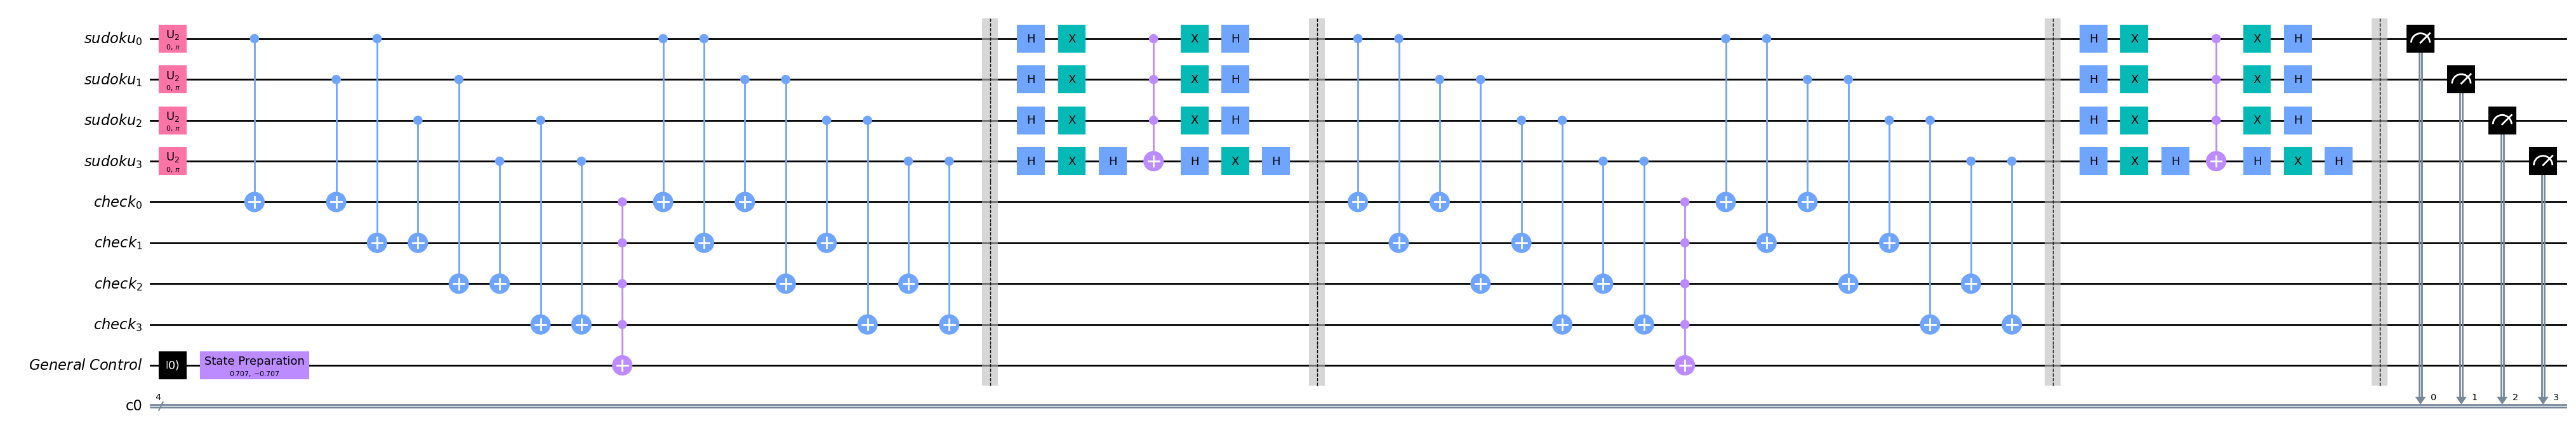

In [8]:
#Quantum Search ALgo
cr = ClassicalRegister(4)
qc = QuantumCircuit(sudoku_reg,check_qubits,general_control,cr)
qc.initialize([1, -1]/np.sqrt(2),general_control)      #initializing output register to |-> to ensure oracle's working
qc.h(sudoku_reg)

#attaching oracle and reflection
for i in range(2) : 
    qc.append(oracle(),list(range(9)))
    qc.barrier()
    qc.append(generate_reflection(4),[0,1,2,3])
    qc.barrier()
qc.measure(sudoku_reg,cr)
print(qc)
result = execute(qc,backend=qasm,shots=1000).result()

dec_circ = qc.decompose()
print("Final Circuit of Quantum Search Algo")
dec_circ.draw(output='mpl',fold=-1)


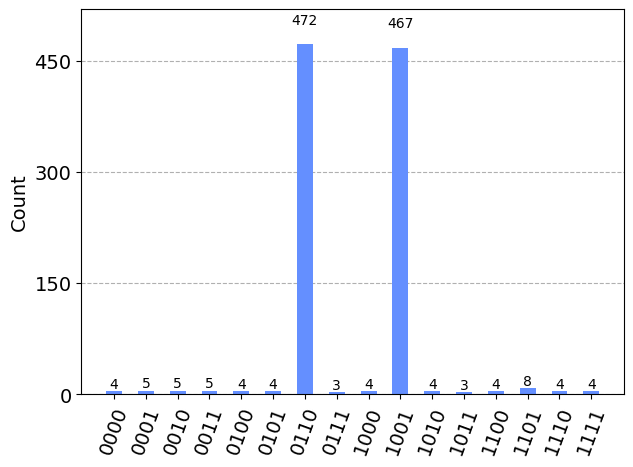

In [9]:
plot_histogram(result.get_counts())

# 4.3 - Quantum Search on graphs (6 pts. total)

It is possible to set the Quantum Search algorithm on a suitably defined graph. In this exercise, you will employ a <b>continuous-time quantum walk</b> to solve a search problem. Consider a set $B$ of vertices of the graph that represents the possible solutions to be identified. Employing a suitably defined Hamiltonian, it will be possible to obtain that set.

Recall the definition of an undirected graph's adjacency matrix $A$:
$$A_{ij} = \begin{cases}1 & \mbox{ if nodes i and j are connected} \\ 0 & \mbox{ otherwise}\end{cases}.$$
We call an undirectd graph **complete** if any pair of its vertices are connected by an edge.

In addition to $A$, consider the degree matrix $D$, which is a diagonal matrix whose element $D_{ii}$ corresponds to the degree of vertex $i$, i.e. the number of the vertices connected to it. In the present case, it will be
$$ D_{ij} = \begin{cases} (N-1) & \mbox{ if } i=j \\ 0 & \mbox{otherwise}\end{cases},$$
where $N$ is the total number of vertices in the graph. Finally, the Laplacian matrix of the graph is the difference:
$$ L = A - D.$$

## 4.3.a Hermiticity of the Laplacian matrix, eigenspace of the Hamiltonian (1 pt.)
Show that the Laplacian of a complete, undirected graph is a Hermitian matrix. Hence, it can be used as a Hamiltonian. Usually, it is multiplied by a rate $\gamma$:
$$ \tilde{\mathcal{H}} = -\gamma L.$$
With this choice, each vertex of the graph is mapped onto a basis state $\ket{j}$. 

Compute the eigenvectors and eigenvalues for the Hamiltonian $\tilde{\mathcal{H}}$ for $\gamma=1$ and $N=4$ (either by hand or with Python).

Prove that also $-\gamma A$ is a valid choice for a Hamiltonian.

### 4.3.a.1 Solution  
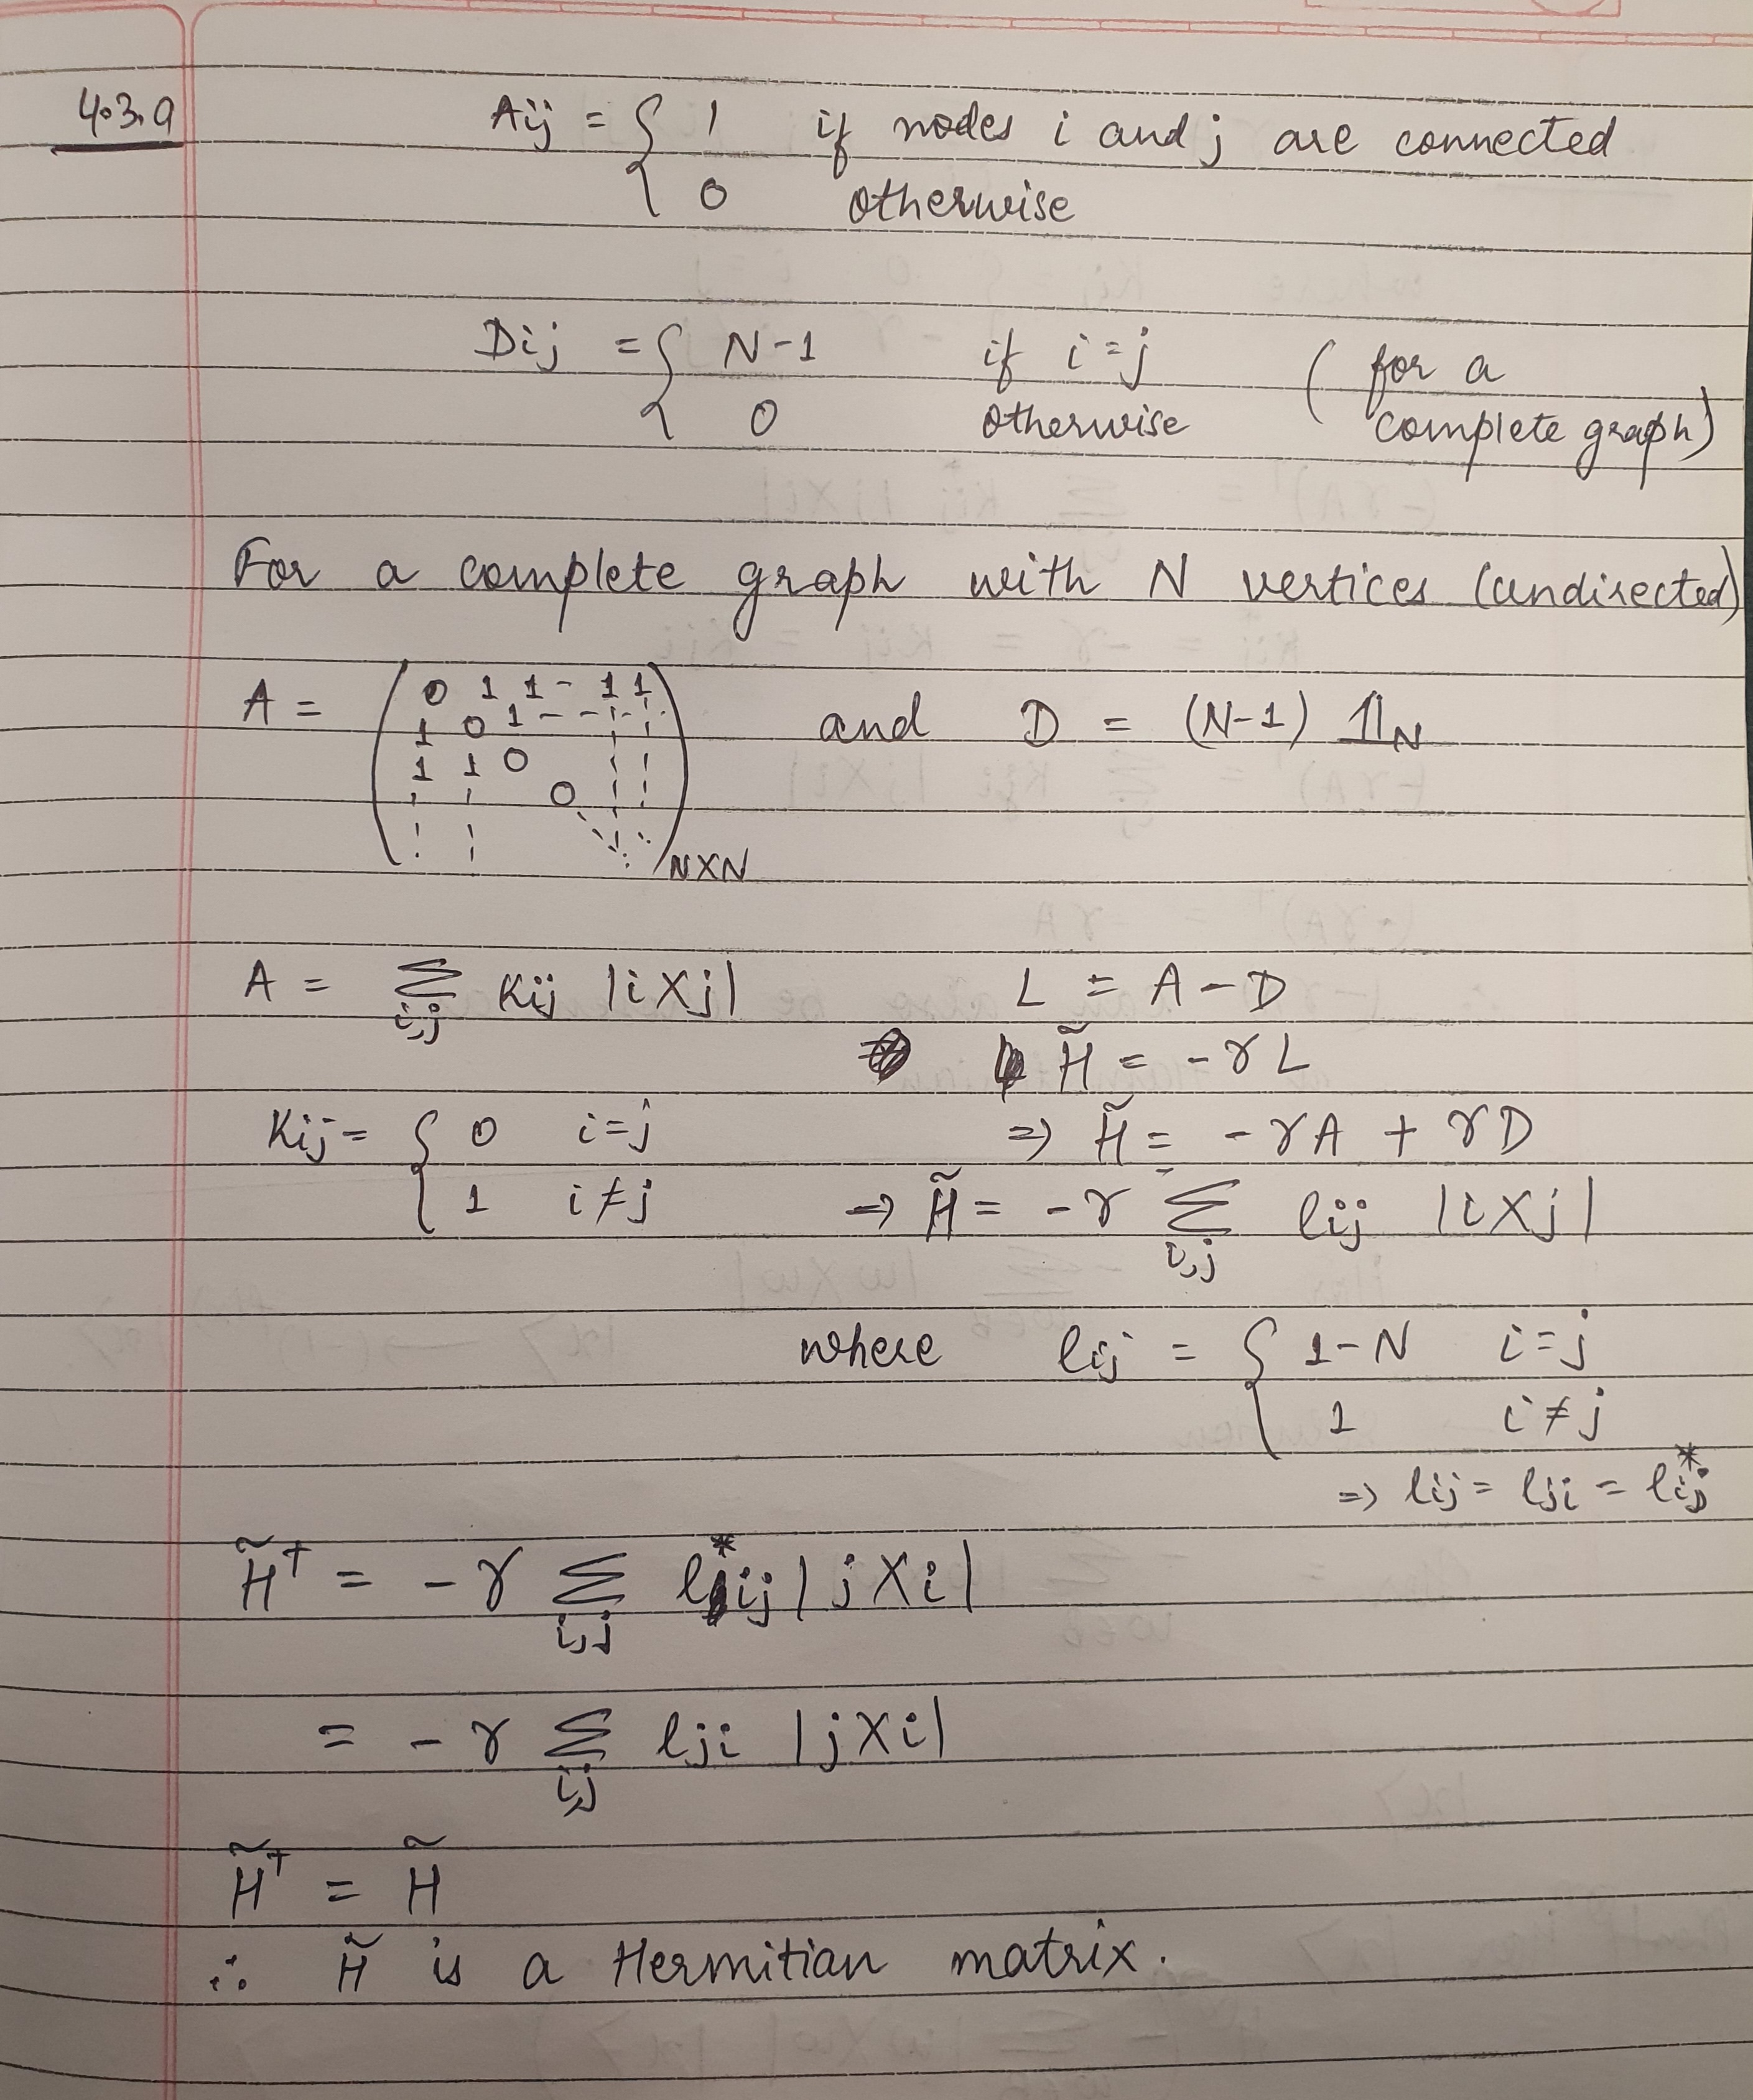

In [10]:
#4.3.a.2 Solution 
N = 4 
gamma = 1
A = matrix = np.zeros((N,N))        #initializing a 4x4 matrix with all zero elements
for i in range(N) : 
    for j in range(N) : 
        if i != j : 
            A[i,j] = 1              #assigning all non diagonal elements to 1 
D = (N-1) * np.identity(4)
H = - gamma * (A - D)
eigvals, eigvecs = np.linalg.eig(H)
print("Eigenvalues = ", eigvals, "\n", "Eigenvectors =", eigvecs)
print("A: \n", A,"\n D :\n",D)
print("H : \n", H)

Eigenvalues =  [ 4.00000000e+00 -1.11022302e-16  4.00000000e+00  4.00000000e+00] 
 Eigenvectors = [[ 0.8660254  -0.5        -0.09465472  0.22731548]
 [-0.28867513 -0.5         0.84315656 -0.32491751]
 [-0.28867513 -0.5        -0.37425092 -0.59849846]
 [-0.28867513 -0.5        -0.37425092  0.69610048]]
A: 
 [[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]] 
 D :
 [[3. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]
H : 
 [[ 3. -1. -1. -1.]
 [-1.  3. -1. -1.]
 [-1. -1.  3. -1.]
 [-1. -1. -1.  3.]]


### 4.3.a.3 Solution  
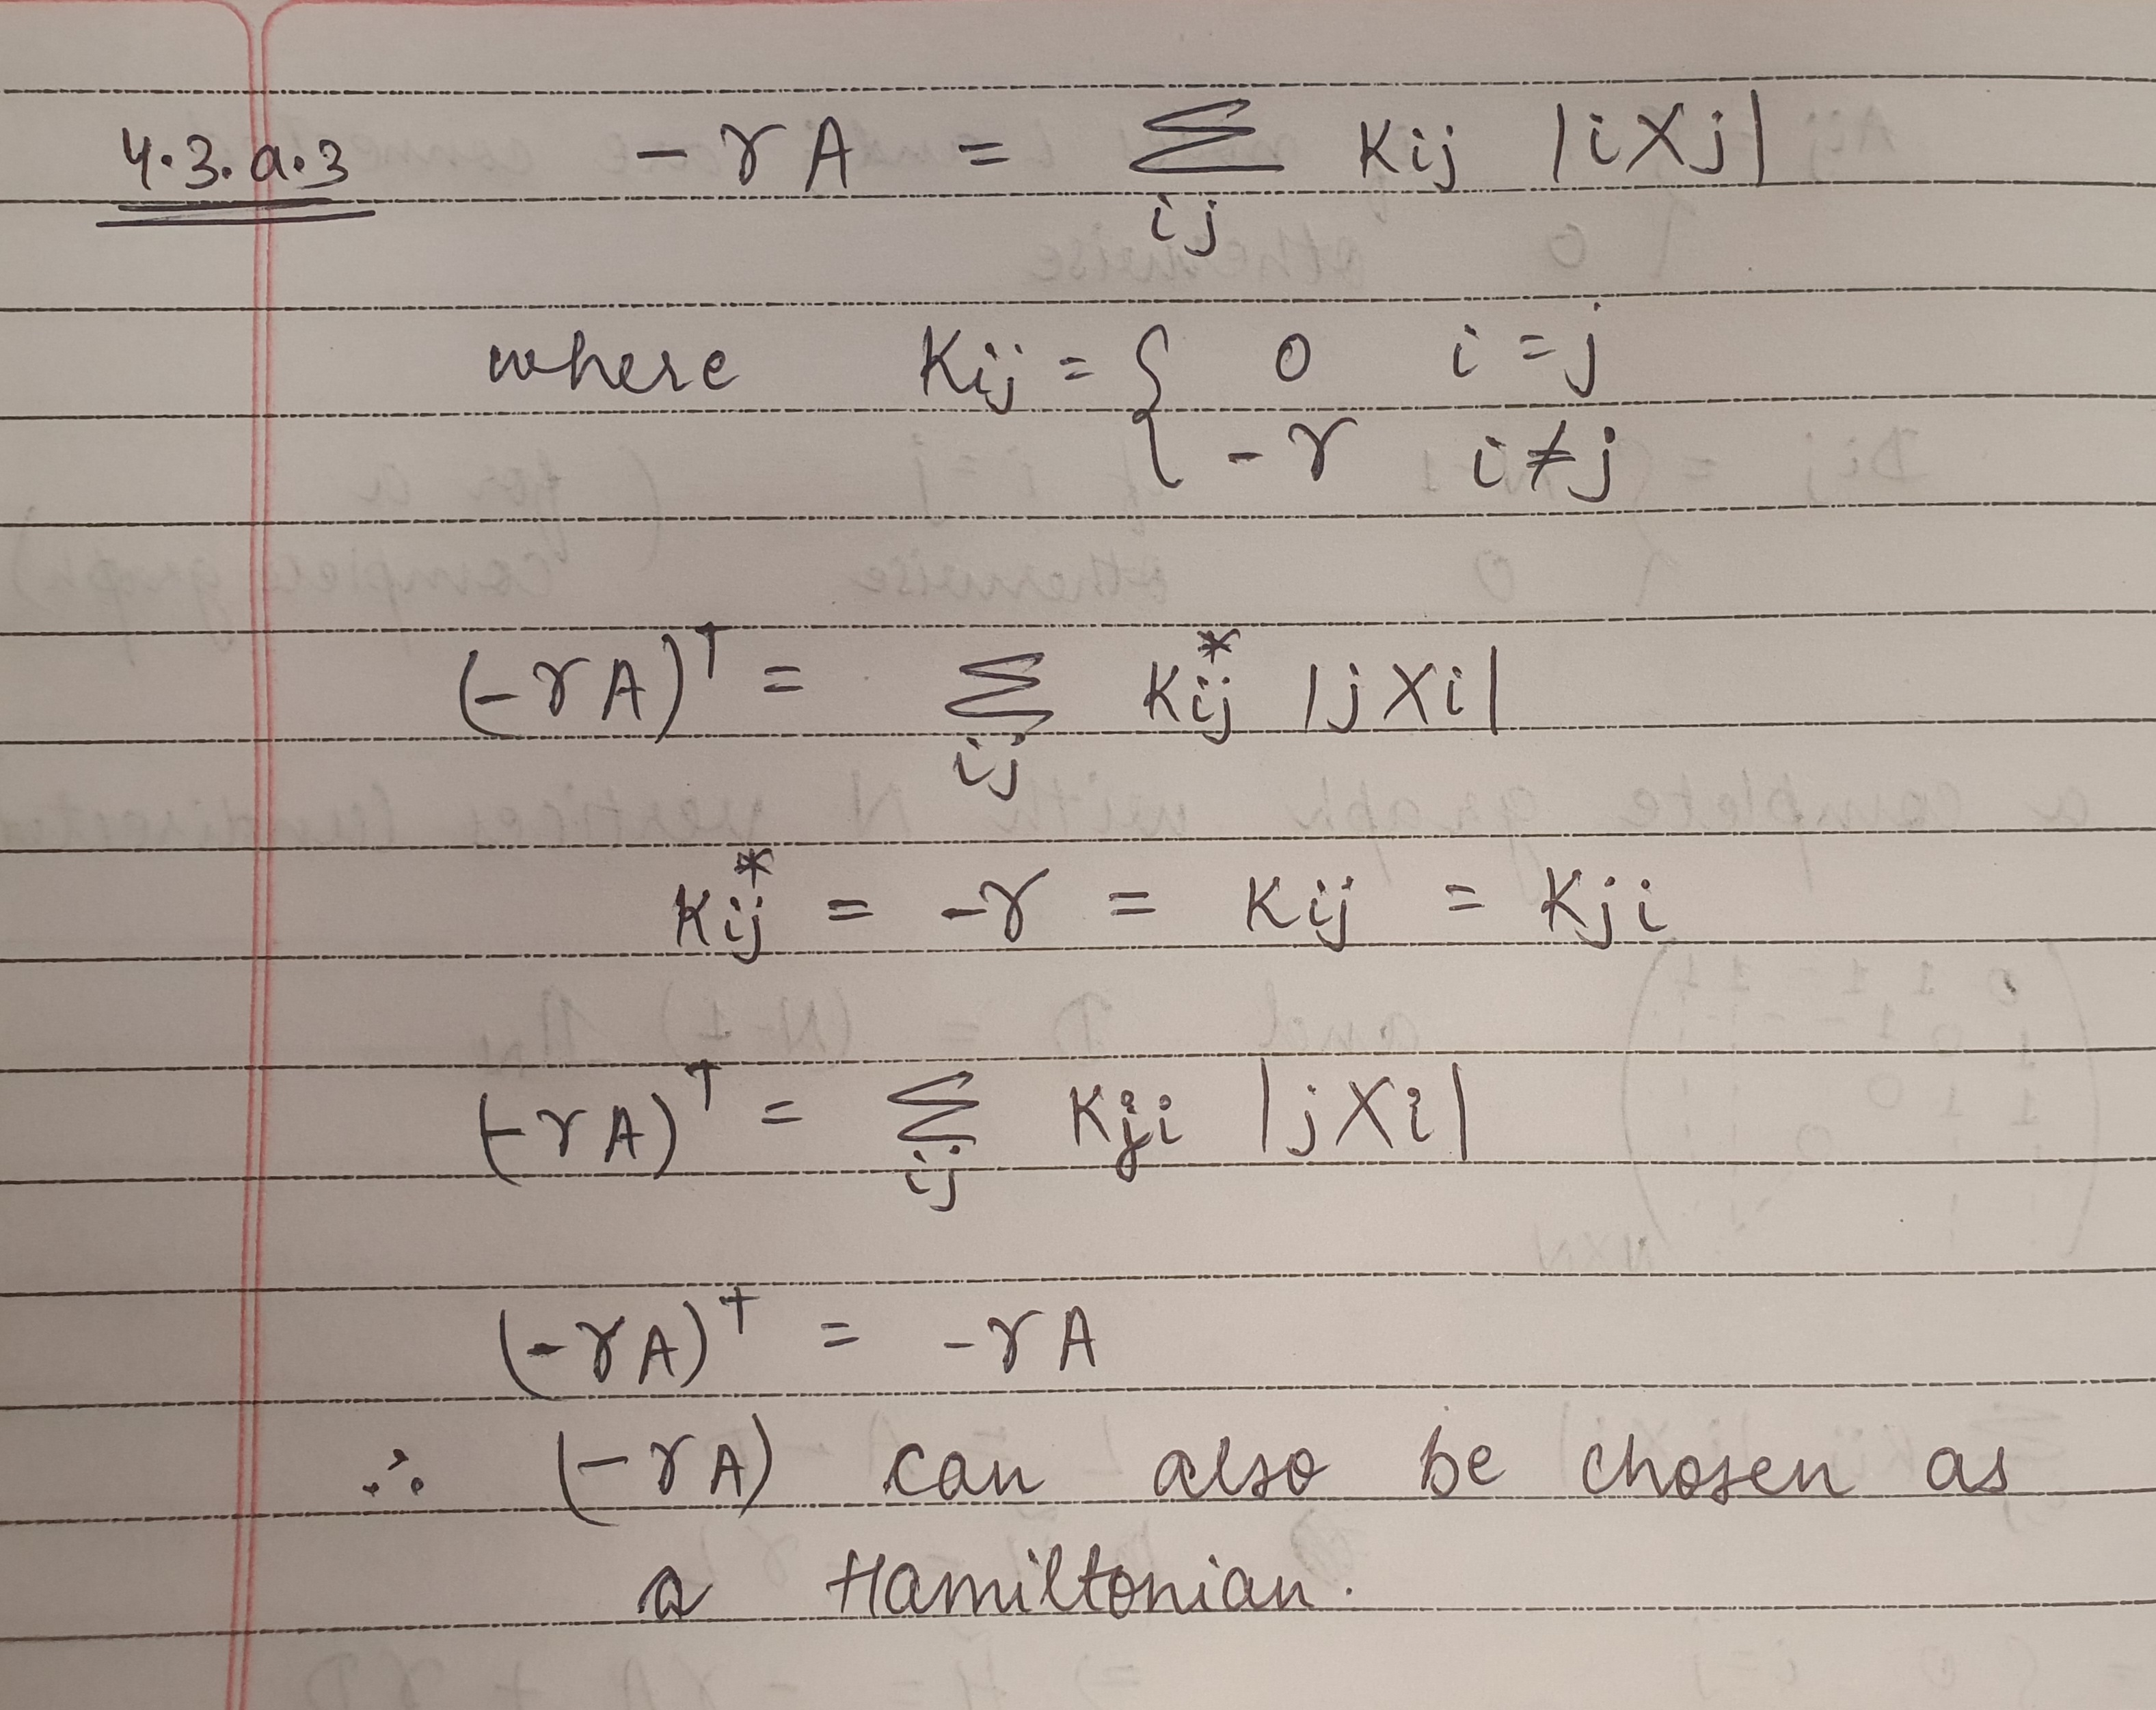

## 4.3.b Oracle Hamiltonian (1 pt.)
The next step is to perform a Quantum Search on the graph. Therefore, it is necessary to have means to recognize the solutions. Let $B$ be the subset of the points of the graph representing the solution; the <b>oracle Hamiltonian</b> is given by
$$ \mathcal{H}_{or} =  -\sum_{w \in B} \ket{w}\bra{w}.$$

Show that the search problem can be mapped onto the problem of finding the ground state of the Hamiltonian $\mathcal{H}_{or}$.

## 4.3.c Geometrical interpretation (2 pts.)
Consider now the overall Hamiltonian of the search problem, given by:
$$ \mathcal{H} = -\gamma A + \mathcal{H}_{or}.$$

Consider also the initial state $\ket{\psi_0}$ given by the balanced superposition of all the positions in the graph, i.e.
$$ \ket{\psi_0} = \frac{1}{\sqrt{N}}\sum_{j=0}^N \ket{j}.$$
Suppose also that there are $M \leq N$ solutions. 
<ol>
<li>With a similar approach as the one used in the lecture, consider the geometric representation in terms of the vector $\ket{\alpha}$ of non-solutions and of the vector $\ket{\beta}$ of solutions. Write $\ket{\psi_0}$ in terms of $\ket{\alpha}$ and $\ket{\beta}$. </li>
<li>Also express the Hamiltonian $\mathcal{H}$ in terms of $\ket{\alpha}$ and $\ket{\beta}$, and computes its eigenvalues and eigenvectors. Assume $\gamma=\frac{1}{N}$.</li>
<li>Compute the energy difference $\Delta E$ between the ground state and the excited state.</li>
</ol>

## 4.3.d Grover time (2 pts.)
Write explicitly the time evolution of the state $\ket{\psi_0}$ under the Hamiltonian $\mathcal{H}$, in the space spanned by $\ket{\alpha}$ and $\ket{\beta}$. Determine the Grover time $T_G$, i.e. the time which is necessary to get a state of the system exactly equal to the solution state $\ket{\beta}$.

Describe what happens if the position on graph is measured at time $t=T_G$.

# 4.4 - Looking for collisions (5 pts.)
Let us consider a function $f:\{0,1\}^n \to C$, such that it is 2-to-1: for each $x_j \in \{0,1\}^n$, there exists exactly one other $x_i$ such that $f(x_i) = f(x_j)$. A pair $(x_i, x_j)$ for which $f(x_i) = f(x_j)$ is called a <b>collision</b>. 
<ol>
    <li>Suppose $S$ is a uniformly-randomly chosen set of $s$ elements of $\{0,1\}^n$. What is the probability that there exists a collision in $S$?</li>
    <li>Give a quantum algorithm that finds a collision, with probability greater or equal than $\frac{2}{3}$, using $\mathcal{O}(N^{1/3})$ queries of the function $f$.</li>
</ol>

### 4.4.1 Solution  
Total elements in f is $2^n$. There are $2^{n-1}$ pairs in f. The probability of getting a pair when s elements are chosen from f is the same as 1 - p(no pairs are selected).  
p(no pairs are selected) = $\frac{\text{ways of selecting s elements such that no pairs are selected}}{\text{Total ways of selecting s elements}}$  
$p(\text{no pairs are selected}) = \frac{2^{n-1}!}{(2^{n-1}-s)!(2^n)}$  
$ p(\text{getting a pair}) = 1 - \frac{2^{n-1}!}{(2^{n-1}-s)!(2^n)} $

# 4.5 The 5-qubit error correcting code (6 pts.)
In the lecture, we discussed Shor's code, which employs 9 physical qubits to protect one logical qubit from any single-qubit error. It can be shown that it is possible to achieve the same result using a smaller code, consisting of only 5 physical qubits. 

The following is the table of the stabilizers for the 5-qubit code:

|  | qubit 1 | qubit 2 | qubit 3 | qubit 4 | qubit 5 |
| --- | --- | --- | --- | --- | ---|
| $M_1$ | $\sigma_x$ | $\sigma_z$ | $\sigma_z$ | $\sigma_x$ | $\mathbb{I}$ |
| $M_2$ | $\mathbb{I}$ | $\sigma_x$ | $\sigma_z$ | $\sigma_z$ | $\sigma_x$ |
| $M_3$ | $\sigma_x$ | $\mathbb{I}$ | $\sigma_x$ | $\sigma_z$ | $\sigma_z$ |
| $M_4$ | $\sigma_z$ | $\sigma_x$ | $\mathbb{I}$ | $\sigma_x$ | $\sigma_z$ |

Show that any one-qubit error can be corrected by the 5-qubit code. </li>



### 4.5. Solution 
The quantum singleton bound can be used to find the bound on the ability of error correcting codes to correct errors.   
- An [n,k,d] code uses n qubits to encode k qubits and is able to correct located errors on up to d − 1 of the qubits.  
- The quantum Singleton bound states that we must have n − k ≥ 2(d − 1)  
-  Classical Singleton bound states that for an [n, k, d] classical code we must have n − k ≥ d − 1 as a quantum code to correct errors on up to t qubits must have distance at least 2t + 1. Therefore, n − k ≥ 4t  
- Thus, a code to encode k = 1 qubits and capable of correcting errors on t = 1 of the qubits must satisfy n − 1 ≥ 4  
- That is, n must be at least 5, so the five qubit code described as above can be used for one-qubit error correction.  

- 